# Problem Statement

To build a CNN based model which can accurately detect melanoma. 
Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. 
A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to 
reduce a lot of manual effort needed in diagnosis.

Melanoma Detection is a multiclass classification problem 
The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

## Solution

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

### Data Reading/Data Understanding

In [2]:
drive.mount('/content/gdrive', force_remount=True )


Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/DATASET/Train/")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/DATASET/Test/')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
epochs = 20
num_classes = 9

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  subset="training",
  validation_split=0.2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

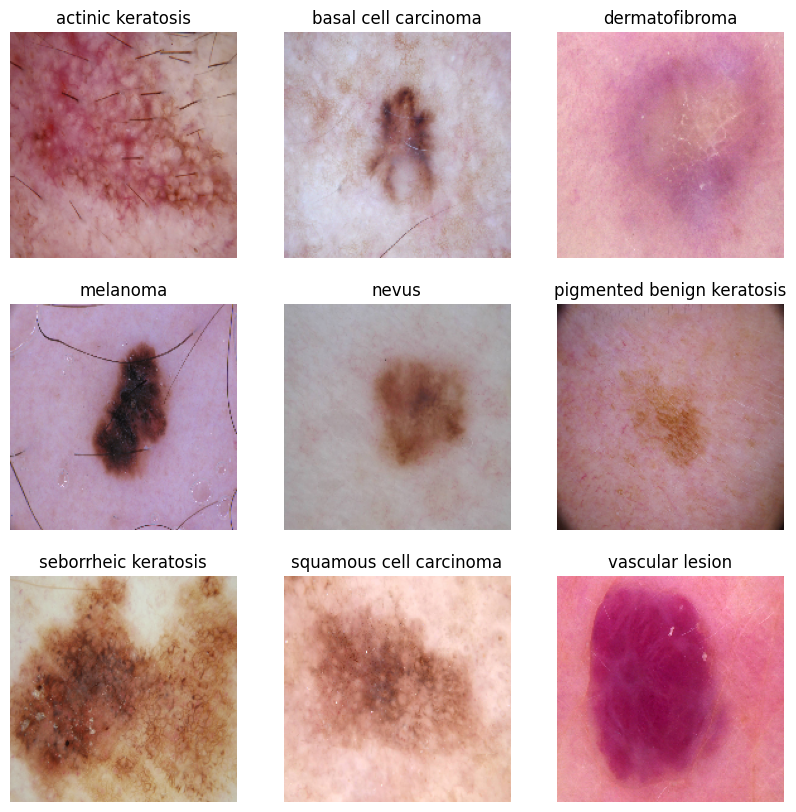

In [9]:
#Dictionary to store the path of image as per the class
files_path_dict = {}
for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(10,10))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
## Your code goes here
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=9, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [11]:
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

### Train the model

In [12]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)
 # callbacks=[checkpoint,earlystop])

Epoch 1/20
56/56 [==============================] - 239s 937ms/step - loss: 1.9482 - accuracy: 0.2740 - val_loss: 1.9083 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6272 - accuracy: 0.4213 - val_loss: 1.6851 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4733 - accuracy: 0.4905 - val_loss: 1.4110 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.3575 - accuracy: 0.5156 - val_loss: 1.4976 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3151 - accuracy: 0.5340 - val_loss: 1.4827 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2124 - accuracy: 0.5519 - val_loss: 1.4199 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 1.1826 - accuracy: 0.5720 - val_loss: 1.5696 - val_accuracy: 0.4787
Epoch 8/20

#### Training Accuracy is 83.48% and Validation accuracy is 50%. Model is overfitting as it performs well in Training data and poor in Validation data

### Visualizing training results

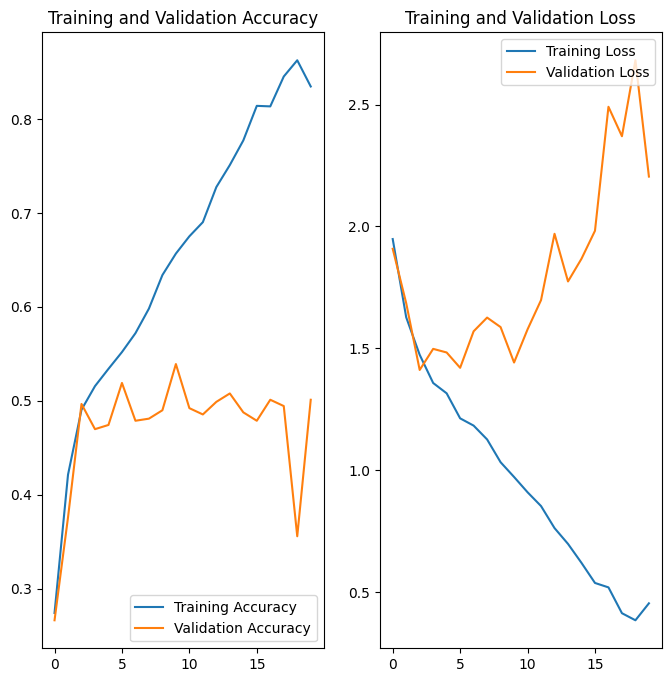

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings :
* Large gap in the Training accuracy and Validation accuracy indicates the model performs well in Training set but poor in testing data set depicts model is overfit
* To start with we introduce the Dropout of 50% and then run the Model

In [14]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

training_set = train_datagen.flow_from_directory(
    data_dir_train,
    classes=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
             'melanoma', 'nevus', 'pigmented benign keratosis',
             'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    data_dir_train,
    classes=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
             'melanoma', 'nevus', 'pigmented benign keratosis',
             'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


### Create the model, compile and train the model adding Dropouts at the FC layer


In [15]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
Dropout(0.5),

model.add(Dense(units=9, activation='softmax'))

### Compiling the model

In [16]:
## Your code goes here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [17]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

Epoch 1/20
57/57 [==============================] - 46s 772ms/step - loss: 2.0537 - accuracy: 0.2345 - val_loss: 1.9655 - val_accuracy: 0.2252
Epoch 2/20
57/57 [==============================] - 44s 764ms/step - loss: 1.8580 - accuracy: 0.3326 - val_loss: 1.6480 - val_accuracy: 0.4212
Epoch 3/20
57/57 [==============================] - 46s 803ms/step - loss: 1.5234 - accuracy: 0.4563 - val_loss: 1.6496 - val_accuracy: 0.4144
Epoch 4/20
57/57 [==============================] - 43s 764ms/step - loss: 1.3854 - accuracy: 0.5092 - val_loss: 1.9594 - val_accuracy: 0.3694
Epoch 5/20
57/57 [==============================] - 46s 815ms/step - loss: 1.3431 - accuracy: 0.5242 - val_loss: 1.6023 - val_accuracy: 0.4617
Epoch 6/20
57/57 [==============================] - 42s 735ms/step - loss: 1.5666 - accuracy: 0.4724 - val_loss: 1.7118 - val_accuracy: 0.3784
Epoch 7/20
57/57 [==============================] - 46s 787ms/step - loss: 1.2964 - accuracy: 0.5365 - val_loss: 1.7111 - val_accuracy: 0.4099

### Training accuracy is 65% and Validation Accuracy is 45%. Model seems to be overfit

### Visualizing the results

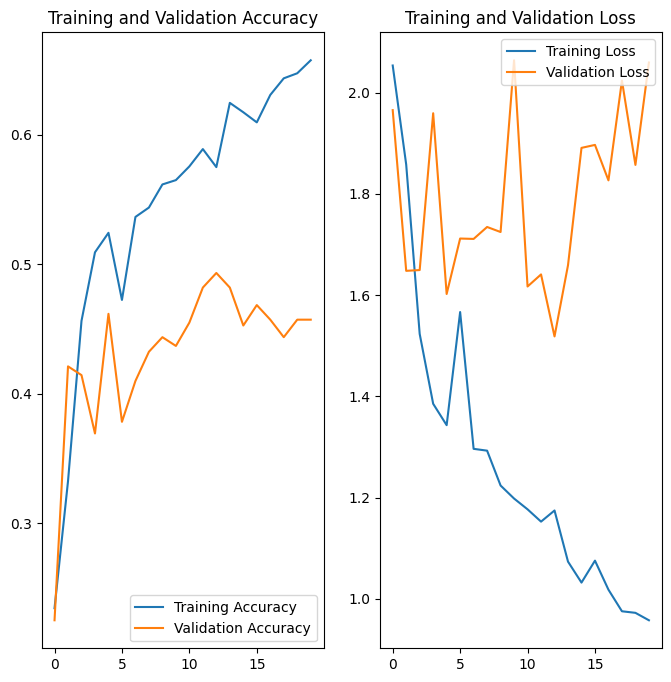

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### There is some improvement in the graphical level. The gap between training data and testing data set is reduced. However the accuracy of both Training and Testing set went down. The reason is class imbalance. The number of data inside the training data set is very less. Hence we are introducing Augmentor library which will rectify the class imbalance problem

## Handling Class Imbalance
#### Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. 

In [20]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [21]:
path_to_training_dataset="/content/gdrive/MyDrive/DATASET/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3110274940>: 100%|██████████| 500/500 [00:21<00:00, 23.59 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F311053C6D0>: 100%|██████████| 500/500 [00:24<00:00, 20.70 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F30D2118610>: 100%|██████████| 500/500 [00:21<00:00, 23.48 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F311058A1A0>: 100%|██████████| 500/500 [01:29<00:00,  5.59 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F31107D3460>: 100%|██████████| 500/500 [01:08<00:00,  7.30 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31B9D92B30>: 100%|██████████| 500/500 [00:18<00:00, 26.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F31101FD720>: 100%|██████████| 500/500 [00:39<00:00, 12.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F313C6865F0>: 100%|██████████| 500/500 [00:22<00:00, 22.08 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATASET/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31101FD720>: 100%|██████████| 500/500 [00:19<00:00, 25.55 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [22]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Augmented data after adding new images to the original training data.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Class Distribution Before Augmentation

In [23]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,vascular lesion,139
1,squamous cell carcinoma,181
2,basal cell carcinoma,376
3,actinic keratosis,114
4,pigmented benign keratosis,462
5,melanoma,438
6,nevus,357
7,seborrheic keratosis,77
8,dermatofibroma,95


### Before Augmentation we could see that the class Seborrheic Keratosis contains the least no of images (only 77 images) for training set which is very less. The class Pigmented Benign Keratosis dominates in terms of proportionate number of samples

#### Create a training dataset

In [24]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)
# validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [25]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Create CNN Model

In [26]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
Dropout(0.5),

model.add(Dense(units=9, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 20, 20, 32)       

In [27]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Train your model

In [32]:
training_set = train_datagen.flow_from_directory(
    data_dir_train,
    classes=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
             'melanoma', 'nevus', 'pigmented benign keratosis',
             'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    data_dir_train,
    classes=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
             'melanoma', 'nevus', 'pigmented benign keratosis',
             'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5395 images belonging to 9 classes.
Found 1344 images belonging to 9 classes.


In [33]:
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

Epoch 1/20
169/169 [==============================] - 110s 639ms/step - loss: 1.1727 - accuracy: 0.5653 - val_loss: 1.1612 - val_accuracy: 0.5692
Epoch 2/20
169/169 [==============================] - 107s 633ms/step - loss: 1.1172 - accuracy: 0.5837 - val_loss: 1.0466 - val_accuracy: 0.6042
Epoch 3/20
169/169 [==============================] - 108s 641ms/step - loss: 1.0024 - accuracy: 0.6278 - val_loss: 0.9681 - val_accuracy: 0.6310
Epoch 4/20
169/169 [==============================] - 107s 635ms/step - loss: 0.9191 - accuracy: 0.6541 - val_loss: 1.1016 - val_accuracy: 0.5967
Epoch 5/20
169/169 [==============================] - 121s 719ms/step - loss: 0.8397 - accuracy: 0.6825 - val_loss: 1.1005 - val_accuracy: 0.6019
Epoch 6/20
169/169 [==============================] - 107s 634ms/step - loss: 0.7780 - accuracy: 0.7097 - val_loss: 0.9047 - val_accuracy: 0.6808
Epoch 7/20
169/169 [==============================] - 107s 633ms/step - loss: 0.6985 - accuracy: 0.7329 - val_loss: 0.8472 -

### Training Accuracy is 86% and Validation accuracy is 79 % . There is definitely a positive improvement in the Validation accuracy and overfitting is reduced upto some extend

####  Visualize the model results

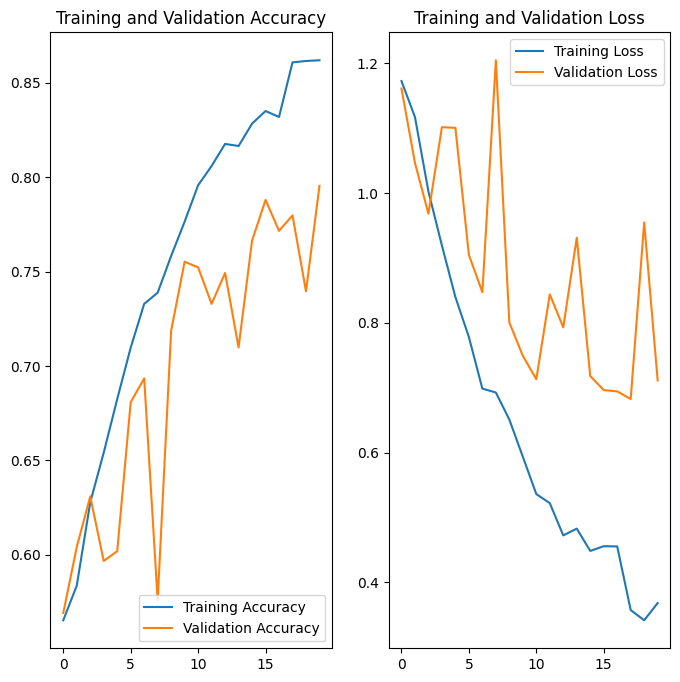

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Model Prediction

1/1 [==============================] - 0s 17ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


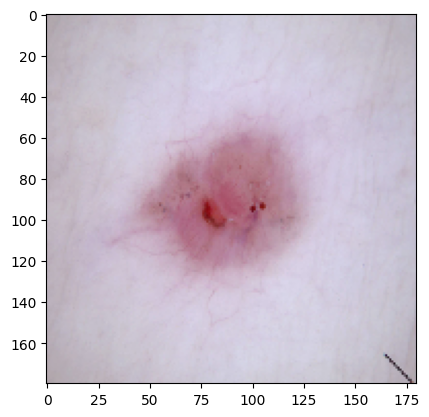

In [35]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )